#Q6

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Softmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
# to flatten datas and reshape it from a 2d matrix to a 1d ndarray
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images / 255.
test_images = test_images.astype("float32") / 255
print(test_images.shape)

(10000, 784)


## Sequential approach

In [8]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(None, 784)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, None, 256)         200960    
                                                                 
 dense_4 (Dense)             (None, None, 10)          2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images,train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 3ms/step - loss: 0.2242 - accuracy: 0.9352
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0938 - accuracy: 0.9724
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0608 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0446 - accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0332 - accuracy: 0.9895
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0258 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0156 - accuracy: 0.9955
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9952
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0104 - accura

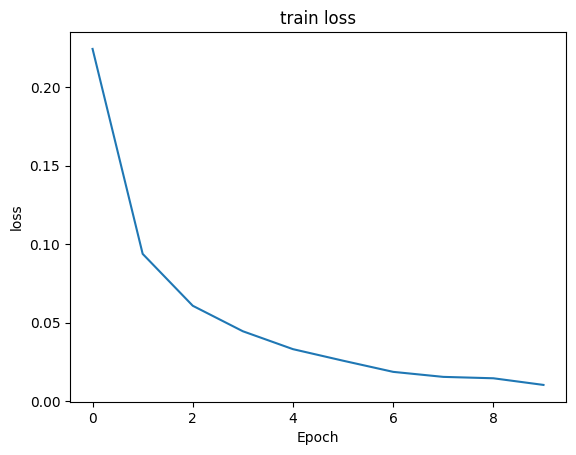

In [26]:
plt.plot(history.history['loss'])
plt.title('train loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

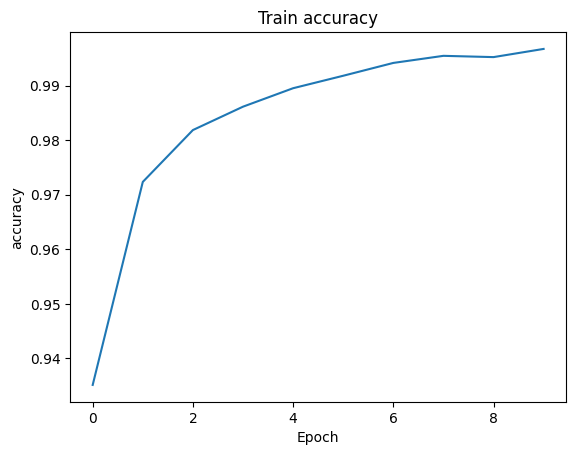

In [25]:
plt.plot(history.history['accuracy'])
plt.title('Train accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

In [27]:
model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 0.0769 - accuracy: 0.9817 - 691ms/epoch - 2ms/step


[0.0769181177020073, 0.9817000031471252]